In [38]:
from opt_hybrid import stogo_search, cluster_promising_regions, local_optimization, plot_best_fom_iter, plot_best_fom_calc
import numpy as np
import pandas as pd

In [18]:
def get_fom(x, y):  # Test function
    return ((x**2 + y - 11)**2 + (x + y**2 -7)**2)

def objective_function(params):
    x, y = params
    return get_fom(x, y)

bounds = [(-5, 5), (-5, 5)]

In [30]:
# Run global search
promising_regions = stogo_search(
    objective_function = objective_function,
    bounds = bounds,
    max_iters=10,
    min_iters=2,
    subdivisions=2,
    initial_subdivisions=4,
    shrinkage_threshold=0.05,
    min_region_size_ratio=0.05
)

Stopping early at iteration 3 due to shrinkage threshold.


In [31]:
clustered_regions = cluster_promising_regions(promising_regions)
best_params, best_fom = local_optimization(objective_function, clustered_regions, 1)

In [41]:
print("Best found parameters:", best_params)
print("Best FoM:", best_fom)

Best found parameters: [ 3.58442834 -1.84812653]
Best FoM: 2.0638211251671205e-16


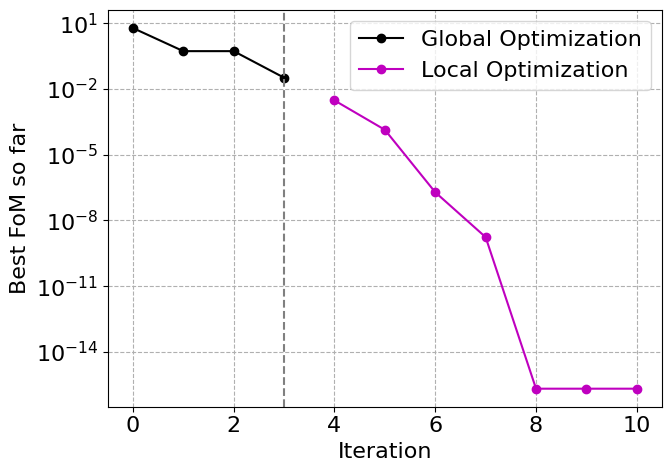

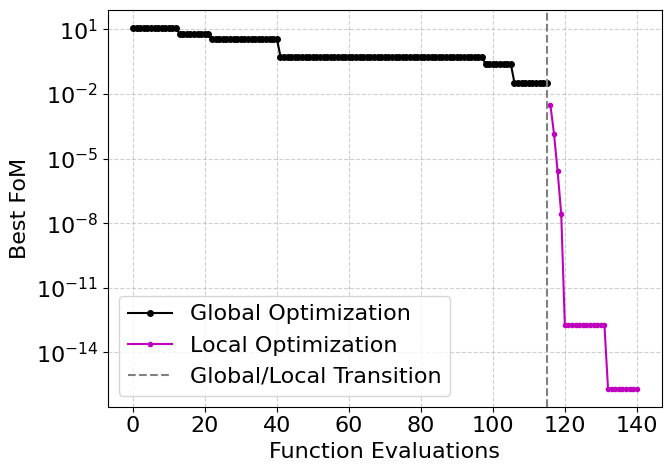

In [43]:
df_global = pd.read_csv("stogo_iterations.csv")
df_local = pd.read_csv("local_optimization_paths.csv")
plot_best_fom_iter(df_global, df_local)
plot_best_fom_calc(df_global, df_local)